In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# data 
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [4]:
data = pd.read_csv('../Data/boston.csv')

data.info()

data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
corr_matrix = data.corr()

corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


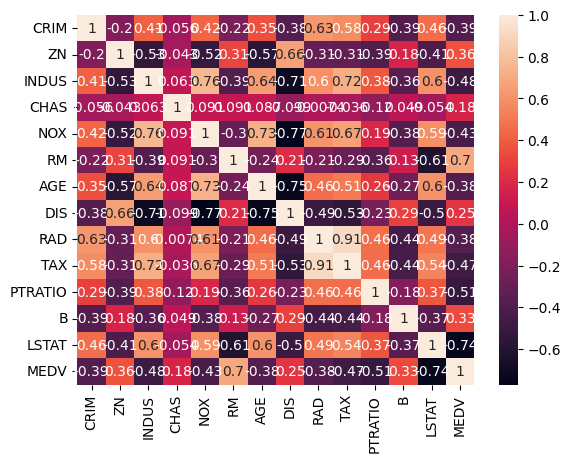

In [6]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
X = data.drop(['MEDV'], axis=1)

y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
range_leafs = range(2,25)
scores = pd.DataFrame({'Train Score': [], 'Test Score': [], 'R2 Score': [], 'Mean Absolute Error':[], 'Mean Squared Error':[], 'Mean Absolute Percentage Error': []})
scores.index.name = 'Max Leaf Nodes'
for i in range_leafs:
    model = DecisionTreeRegressor(max_leaf_nodes=i, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.loc[i] = [round(model.score(X_train, y_train),4), round(model.score(X_test, y_test),4), round(r2_score(y_test, y_pred),4), round(mean_absolute_error(y_test, y_pred),4), round(mean_squared_error(y_test, y_pred),4), round(mean_absolute_percentage_error(y_test, y_pred),4)]
    
print(scores)

                Train Score  Test Score  R2 Score  Mean Absolute Error  \
Max Leaf Nodes                                                           
2                    0.4694      0.3723    0.3723               5.1548   
3                    0.6226      0.5257    0.5257               4.2860   
4                    0.7204      0.6226    0.6226               3.8771   
5                    0.7697      0.6114    0.6114               3.7960   
6                    0.8098      0.6373    0.6373               3.7066   
7                    0.8321      0.6765    0.6765               3.3932   
8                    0.8531      0.6903    0.6903               3.2750   
9                    0.8721      0.6768    0.6768               3.3347   
10                   0.8826      0.6769    0.6769               3.3457   
11                   0.8900      0.6797    0.6797               3.2790   
12                   0.8958      0.6801    0.6801               3.2784   
13                   0.9010      0.678

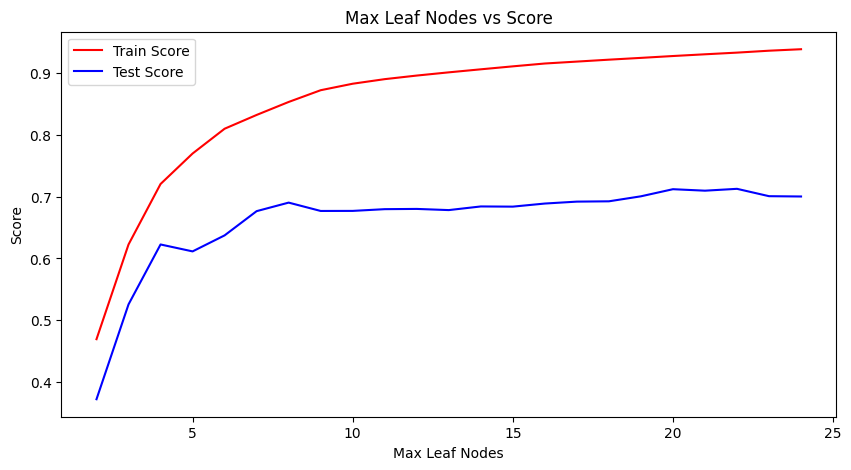

In [9]:
plt.figure(figsize=(10,5))
plt.plot(range_leafs, scores['Train Score'], color='red', label='Train Score')
plt.plot(range_leafs, scores['Test Score'], color='blue', label='Test Score')
plt.legend()
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Score')
plt.title('Max Leaf Nodes vs Score')
plt.show()

In [10]:
range_depth = range(1,25)
scores = pd.DataFrame({'Train Score': [], 'Test Score': [], 'R2 Score': [], 'Mean Absolute Error':[], 'Mean Squared Error':[], 'Mean Absolute Percentage Error': []})
scores.index.name = 'Max Depth'
for i in range_depth:
    model = DecisionTreeRegressor(max_depth=i, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.loc[i] = [round(model.score(X_train, y_train),4), round(model.score(X_test, y_test),4), round(r2_score(y_test, y_pred),4), round(mean_absolute_error(y_test, y_pred),4), round(mean_squared_error(y_test, y_pred),4), round(mean_absolute_percentage_error(y_test, y_pred),4)]
    
print(scores)

           Train Score  Test Score  R2 Score  Mean Absolute Error  \
Max Depth                                                           
1               0.4694      0.3723    0.3723               5.1548   
2               0.7204      0.6226    0.6226               3.8771   
3               0.8511      0.6629    0.6629               3.4529   
4               0.8994      0.6679    0.6679               3.3035   
5               0.9283      0.6788    0.6788               3.0854   
6               0.9520      0.6947    0.6947               3.0741   
7               0.9691      0.6774    0.6774               3.0904   
8               0.9837      0.6787    0.6787               3.0518   
9               0.9906      0.6412    0.6412               3.2115   
10              0.9951      0.6703    0.6703               3.1041   
11              0.9981      0.6624    0.6624               3.1879   
12              0.9993      0.6665    0.6665               3.1646   
13              0.9999      0.6636

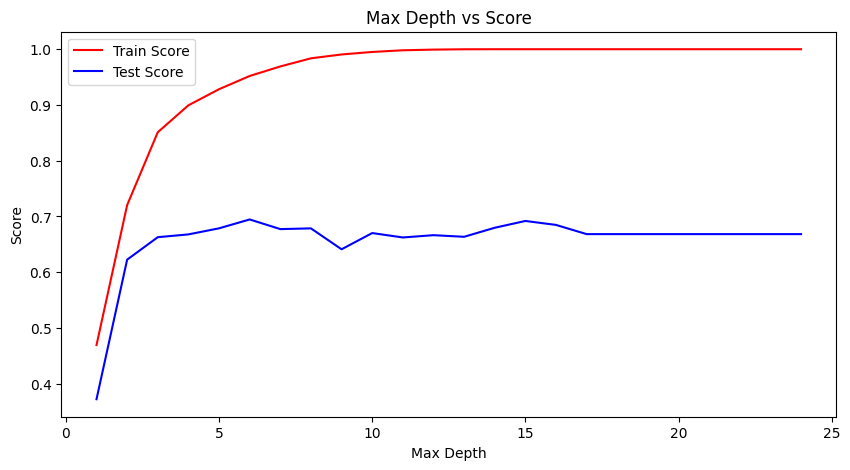

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range_depth, scores['Train Score'], color='red', label='Train Score')
plt.plot(range_depth, scores['Test Score'], color='blue', label='Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Max Depth vs Score')
plt.show()

In [12]:
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=15, max_leaf_nodes=22)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.to_csv('DT.csv')

In [13]:
print('-----------------------------------')
print('Decision Tree Regressor')
print(f'Max Depth: {decision_tree.max_depth}')
print(f'Max Leaf Nodes: {decision_tree.max_leaf_nodes}')
print('Train Score: ', decision_tree.score(X_train, y_train))
print('Test Score: ', decision_tree.score(X_test, y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test, y_pred))
# print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('-----------------------------------')

-----------------------------------
Decision Tree Regressor
Max Depth: 15
Max Leaf Nodes: 22
Train Score:  0.932892905697198
Test Score:  0.7126264863320659
Mean Squared Error:  23.928299774971165
R2 Score:  0.7126264863320659
Mean Absolute Error:  2.9617306227792413
Mean Absolute Percentage Error:  0.15611810437775725
-----------------------------------


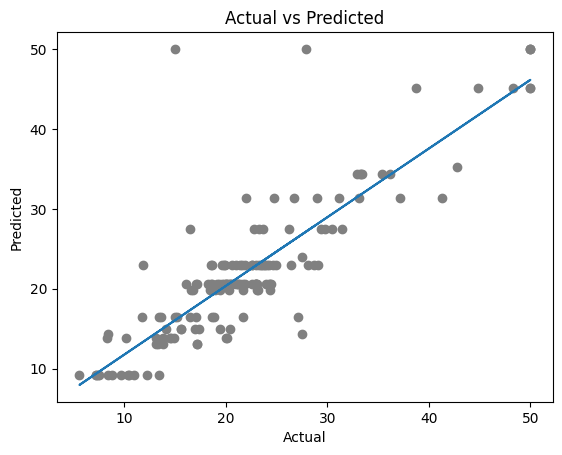

In [14]:
plt.scatter(y_test, y_pred, color='grey', marker='o')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b)        
plt.show()